## 패키지 import

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 모델
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
X_data = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\final_df.csv', index_col=0)
X_data.head()

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65


In [4]:
X_data.X_datashape

(50094, 4)

## 설명변수별 목표변수 간의 관계 시각화

- 어떤 설명변수가 정상/불량 결정짓는 주요 영향인자인지 그래프로 시각화

In [25]:
# 정상 데이터 모음
data_1 = X_data[(X_data['QC']==1)]
data_1

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65
...,...,...,...,...
2021-10-27 18:36:03.300,1,15.38,2.05,42.84
2021-10-27 18:36:08.300,1,19.08,1.91,42.64
2021-10-27 18:36:13.300,1,18.14,2.11,44.09
2021-10-27 18:36:18.300,1,17.96,1.92,43.95


In [26]:
# 불량 데이터 모음
data_0 = X_data[(X_data['QC']==0)]
data_0

,QC,Voltage,pH,Temp
2021-09-08 18:23:01.700,0,15.53,1.97,41.20
2021-09-08 18:23:06.700,0,16.86,2.08,42.13
2021-09-08 18:23:11.700,0,18.19,1.89,44.62
2021-09-08 18:23:16.700,0,15.59,1.95,42.55
2021-09-08 18:23:21.700,0,15.44,2.43,44.54
...,...,...,...,...
2021-10-25 18:00:47.800,0,17.21,1.88,41.14
2021-10-25 18:00:52.800,0,18.32,2.04,44.78
2021-10-25 18:00:57.800,0,16.19,2.48,41.44
2021-10-25 18:01:02.800,0,19.30,1.81,41.09


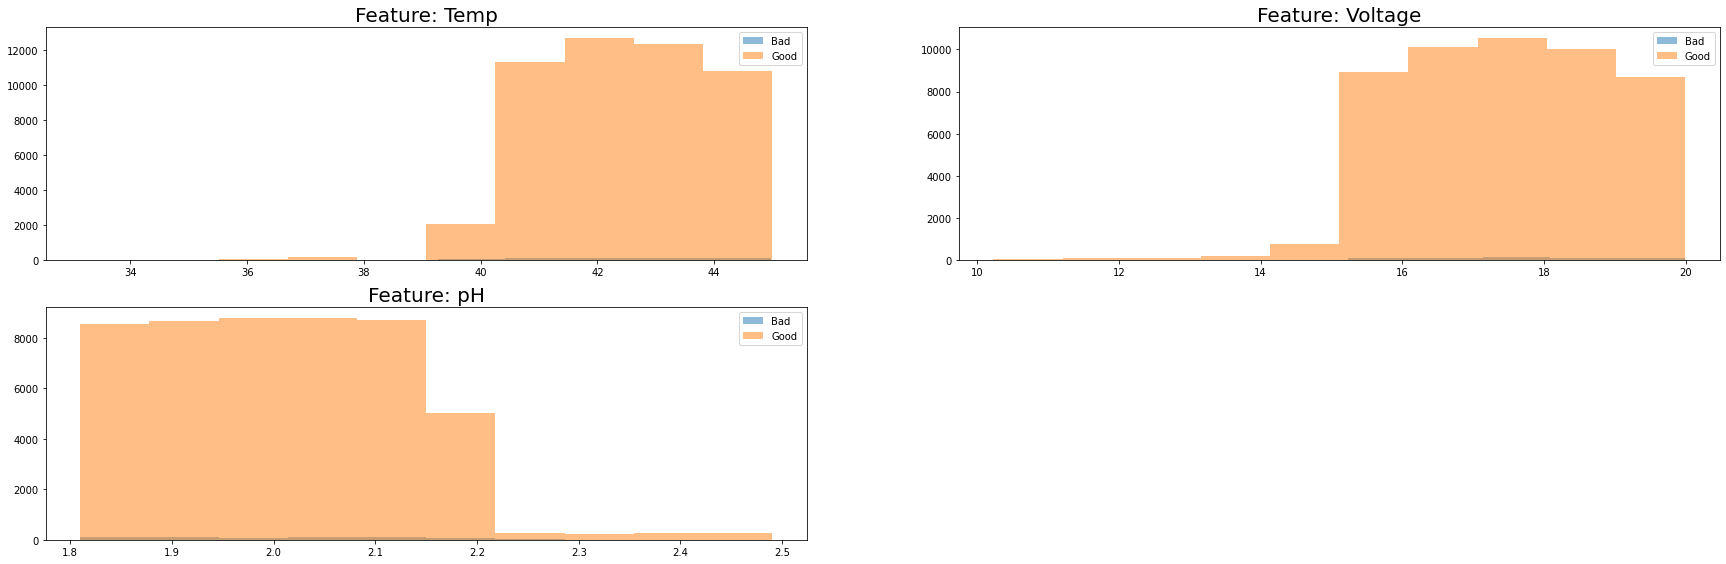

In [27]:
# 설명변수 설정
x = X_data[X_data.columns.difference(['QC'])]
# 설명변수명 리스트
feature_name = x.columns
plt.figure(figsize=(30,30))
for col_idx in range(len(feature_name)):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    # subplot(행, 열, 어디에 그릴지)
    plt.subplot(6, 2, col_idx+1)
    # 불량에 해당하는 데이터 histogram 시각화
    # alpha : 투명도
    plt.hist(X_data[X_data['QC'] == 0][feature_name[col_idx]], label = "Bad", alpha =0.5)
    # 정상에 해당하는 데이터 histogram 시각화
    plt.hist(X_data[X_data['QC'] == 1][feature_name[col_idx]], label = "Good", alpha =0.5)
    plt.legend()
    plt.title("Feature: "+ feature_name[col_idx], fontsize = 20)
plt.show()
# 시각적으로 미세한 차이가 보인다 -> 특성중요도 확인 필요

## Train/ Validation/ Test Data Set Make

In [5]:
# train
train_np = X_data[['Temp', 'Voltage', 'pH']].to_numpy()
train_np

array([[43.15, 19.74,  2.15],
       [40.13, 18.01,  2.08],
       [43.46, 18.73,  2.18],
       ...,
       [44.09, 18.14,  2.11],
       [43.95, 17.96,  1.92],
       [44.11, 19.22,  1.81]])

In [6]:
# target
target_np = X_data['QC'].to_numpy()
target_np

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
# 학습용/검증용/테스트용 데이터 생성(60:20:20)
# 1. 학습, 테스트 80:20 으로 나눔
train_input, test_input, train_target, test_target = train_test_split(train_np, target_np, random_state=42, test_size=0.2)

In [8]:
# 2. 학습 -> 학습, 검증 75:25 로 나눔
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, random_state=42, test_size=0.25)

In [9]:
train_input.shape

(30056, 3)

In [10]:
test_input.shape

(10019, 3)

In [11]:
val_input.shape

(10019, 3)

## 모델링

In [12]:
# 정규화
scaler = RobustScaler()
train_input = scaler.fit_transform(train_input)
val_input = scaler.transform(val_input)
test_input = scaler.transform(test_input)

In [13]:
# Random Forest 모델 학습
model_1 = RandomForestClassifier(random_state=42,)
clf = model_1.fit(train_input, train_target)

In [14]:
clf

RandomForestClassifier(random_state=42)

In [15]:
# 훈련 정확도
clf.score(train_input, train_target)

0.9999001863188715

In [16]:
# 검증 정확도
clf.score(val_input, val_target)

0.9877233256812057

## Classifier 모델링 함수

### 기본 모델링 함수

- 하이퍼파라미터 튜닝 없이 모델을 학습하고 성능을 평가하는 함수
- 함수는 파라미터로 알고리즘 종류, 독립변수와 종속변수의 훈련 데이터, 테스트 데이터를 각각 전달받는다

In [1]:
def modeling_uncustomized (algorithm, train_input, val_input, train_target, val_target):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=42)
    uncustomized.fit(train_input, train_target)
    # Train Data 설명력
    train_score_before = uncustomized.score(train_input, train_target).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(val_input, val_target).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

##  모델 평가

In [17]:
clf_pred = clf.predict(test_input)
print('Random Forest Model Predict : ', clf_pred)
rmse = sqrt(mean_squared_error(test_target, clf_pred))
print('Random Forest Model RMSE : ', rmse)


Random Forest Model Predict :  [1 1 1 ... 1 1 1]
Random Forest Model RMSE :  0.11347042117083507


In [18]:
# 테스트 정확도
accuracy_score(test_target, clf_pred)

0.9871244635193133

In [19]:
print(classification_report(test_target, clf_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.50      0.01      0.02       129
     class 1       0.99      1.00      0.99      9890

    accuracy                           0.99     10019
   macro avg       0.74      0.50      0.50     10019
weighted avg       0.98      0.99      0.98     10019



In [20]:
# Feature Importance 확인
feature_scores = pd.Series(clf.feature_importances_, index=['Temp','Voltage','pH']).sort_values(ascending=True)
feature_scores

pH         0.173130
Voltage    0.395599
Temp       0.431271
dtype: float64

<AxesSubplot:>

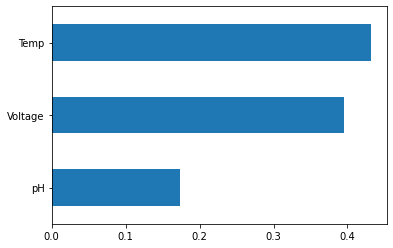

In [21]:
# feature_scores.reverse()
# plt.barh(feature_scores)
feature_scores.plot.barh()

## 모델 튜닝